In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [3]:
shots = pd.read_excel('extracted_data/shots_pred.xlsx')
passes = pd.read_excel('extracted_data/passes.xlsx')

In [4]:
# calculate goal distance in meters
shots.loc[:, 'goal_distance_m'] = [np.sqrt(np.square((120-shots['location_x'].iloc[i])/120*105) + np.square((40-shots['location_y'].iloc[i])/80*70)) for i in range(len(shots))]

Analyse von Angriffsmustern

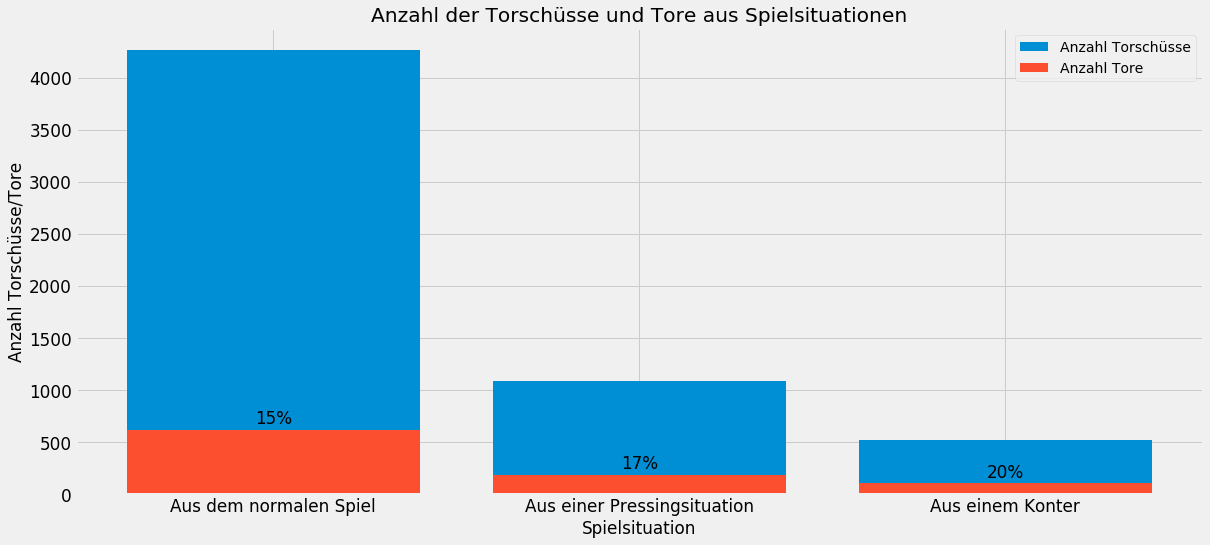

In [5]:
# Torschüsse und Tore in Abhängigkeit der Spielsituation
situations = ['regular_play', 'from_pressing', 'from_counter']
goals = shots[shots['goal'] == 1]
num_goals = [len(goals[goals[situation] == 1]) if situation != 'from_pressing' else len(goals[(goals['from_pressing'] == 1) & (goals['from_counter'] == 0)]) for situation in situations]
num_shots = [len(shots[shots[situation] == 1]) if situation != 'from_pressing' else len(shots[(shots['from_pressing'] == 1) & (shots['from_counter'] == 0)]) for situation in situations]
pct_scored = [int(np.round(100 * num_goals[i] / num_shots[i])) for i in range(len(num_shots))]
plt.figure(figsize=(18,8))
x_labels = ['Aus dem normalen Spiel', 'Aus einer Pressingsituation', 'Aus einem Konter']
plt.bar(x=x_labels, height=num_shots, label='Anzahl Torschüsse')
plt.bar(x=x_labels, height=num_goals, label='Anzahl Tore')
for i in range(len(situations)):
    plt.text(i - 0.05, num_goals[i] + 60, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Torschüsse und Tore aus Spielsituationen')
plt.xlabel('Spielsituation')
plt.ylabel('Anzahl Torschüsse/Tore')
plt.legend()
plt.show()

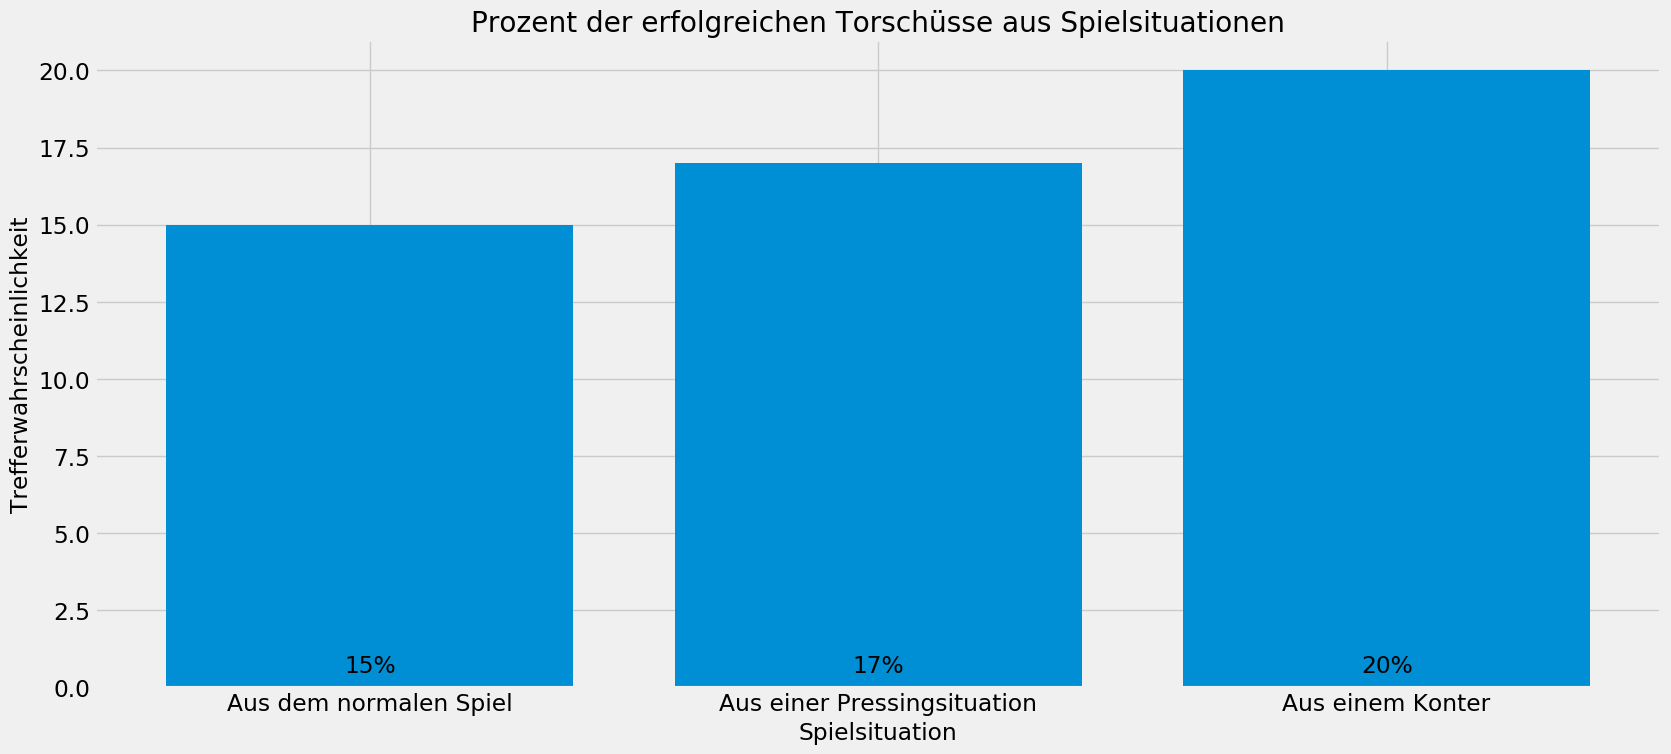

In [7]:
plt.figure(figsize=(18,8))
plt.bar(x=x_labels, height=pct_scored)
for i in range(len(situations)):
    plt.text(i - 0.05, 0.5, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Prozent der erfolgreichen Torschüsse aus Spielsituationen')
plt.xlabel('Spielsituation')
plt.ylabel('Trefferwahrscheinlichkeit')
plt.show()

In [9]:
passes.head()

duration  match_id  minute  period  position  second  under_pressure  \
0     0.806      9592       0       1        24       7               0   
1     1.849      9592       0       1        11       9               0   
2     1.036      9592       0       1         2      13               0   
3     1.237      9592       0       1         9      15               0   
4     1.941      9592       0       1         3      18               0   

   recipient     length     angle  end_location_x  end_location_y  backheel  \
0       5203  13.000000  3.141593            48.0            41.0         0   
1       6374  26.476404  1.380808            55.0            73.0         0   
2       5470  15.000000 -2.214297            51.0            61.0         0   
3       5213  19.723083 -2.102520            41.0            44.0         0   
4       5492  22.203604 -1.435269            45.0            17.0         0   

   deflected  miscommunication  cross  cut_back  switch  shot_assist  \
0          0                 0      0         0       0            0   
1          0                 0      0         0       0            0   
2          0                 0      0         0       0            0   
3          0                 0      0         0       0            0   
4          0                 0      0         0       0            0   

   goal_assist  team_id  player_id  location_x  location_y  Ground Pass  \
0            0      217       5246        61.0        41.0            1   
1            0      217       5203        50.0        47.0            1   
2            0      217       6374        60.0        73.0            1   
3            0      217       5470        51.0        61.0            1   
4            0      217       5213        42.0        39.0            1   

   Low Pass  High Pass  Drop Kick  Head  Kepper Arm  Left Foot  Right Foot  \
0         0          0          0     0           0          0           1   
1         0          0          0     0           0          0           1   
2         0          0          0     0           0          0           1   
3         0          0          0     0           0          0           1   
4         0          0          0     0           0          0           1   

   No Touch  Corner  Free Kick  Goal Kick  Interception  Kick Off  Recovery  \
0         0       0          0          0             0         1         0   
1         0       0          0          0             0         0         0   
2         0       0          0          0             0         0         0   
3         0       0          0          0             0         0         0   
4         0       0          0          0             0         0         0   

   Throw-in  Incomplete  Injury Clearance  Out  Pass Offside  complete  \
0         0           0                 0    0             0         1   
1         0           0                 0    0             0         1   
2         0           0                 0    0             0         1   
3         0           0                 0    0             0         1   
4         0           0                 0    0             0         1   

   Inswinging  Outswinging  Straight  Through Ball  pred_accuracy  
0           0            0         0             0       0.993079  
1           0            0         0             0       0.982089  
2           0            0         0             0       0.990021  
3           0            0         0             0       0.991103  
4           0            0         0             0       0.984194

In [11]:
# passes from open_play
open_passes = passes[(passes['corner'] == 0) & (passes['free_kick'] == 0) & (passes['goal_kick'] == 0) & (passes['kick_off'] == 0) & (passes['throw_in'] == 0)]

In [12]:
len(open_passes[(open_passes['cross'] == 1) & (open_passes['cut_back'] == 1)])

551

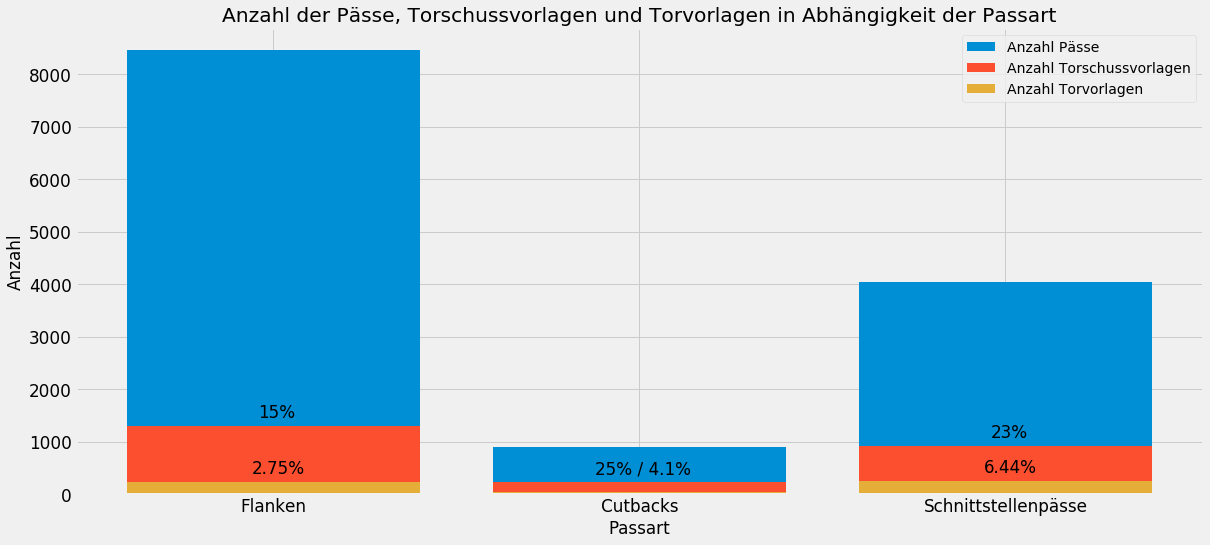

In [14]:
# Torschüsse und Tore in Abhängigkeit der Passart
situations = ['cross', 'cut_back', 'through_ball']
shot_assists = open_passes[(open_passes['shot_assist'] == 1) | (open_passes['goal_assist'] == 1)]
goal_assists = open_passes[open_passes['goal_assist'] == 1]
num_shot_assists = [len(shot_assists[shot_assists[situation] == 1]) if situation != 'cross' else len(shot_assists[(shot_assists['cross'] == 1) & (shot_assists['cut_back'] == 0)]) for situation in situations]
num_goal_assists = [len(goal_assists[goal_assists[situation] == 1]) if situation != 'cross' else len(goal_assists[(goal_assists['cross'] == 1) & (goal_assists['cut_back'] == 0)]) for situation in situations]
num_passes = [len(open_passes[open_passes[situation] == 1]) if situation != 'cross' else len(open_passes[(open_passes['cross'] == 1) & (open_passes['cut_back'] == 0)]) for situation in situations]
pct_shot = [int(np.round(100 * num_shot_assists[i] / num_passes[i])) for i in range(len(num_passes))]
pct_scored = [np.round(100 * num_goal_assists[i] / num_passes[i], 2) for i in range(len(num_passes))]
plt.figure(figsize=(18,8))
x_labels = ['Flanken', 'Cutbacks', 'Schnittstellenpässe']
plt.bar(x=x_labels, height=num_passes, label='Anzahl Pässe')
plt.bar(x=x_labels, height=num_shot_assists, label='Anzahl Torschussvorlagen')
plt.bar(x=x_labels, height=num_goal_assists, label='Anzahl Torvorlagen')
for i in [0,2]:
    plt.text(i - 0.06, num_goal_assists[i] + 160, str(pct_scored[i]) + '%', fontsize='large')
for i in [0,2]:
    plt.text(i - 0.04, num_shot_assists[i] + 160, str(pct_shot[i]) + '%', fontsize='large')
plt.text(1 - 0.12, num_shot_assists[1] + 160, str(pct_shot[1]) + '%' + ' / ' + str(pct_scored[1]) + '%', fontsize='large')
plt.title('Anzahl der Pässe, Torschussvorlagen und Torvorlagen in Abhängigkeit der Passart')
plt.xlabel('Passart')
plt.ylabel('Anzahl')
plt.legend()
plt.show()

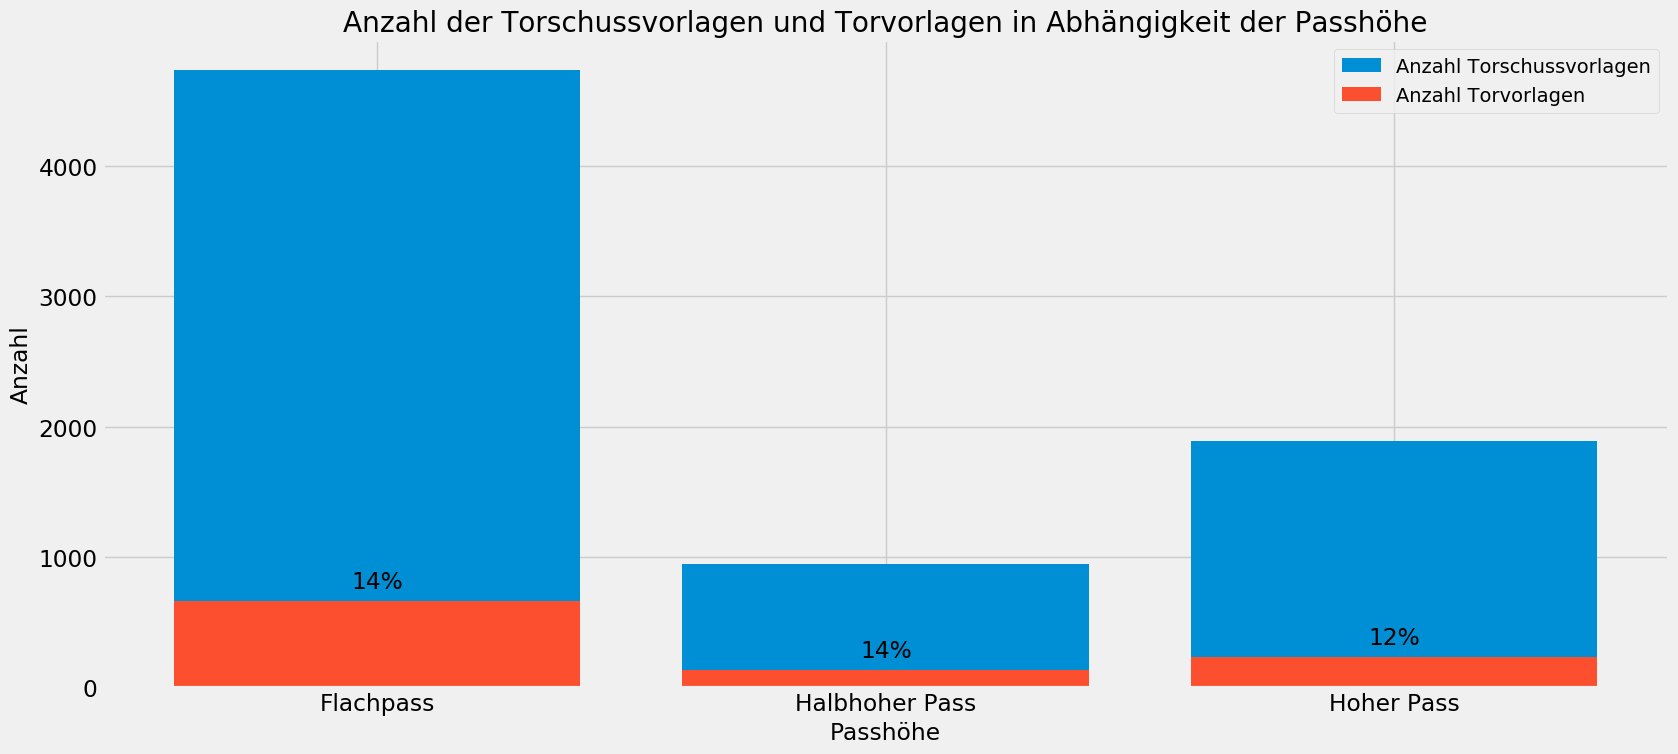

In [12]:
# Torschüsse und Tore in Abhängigkeit der Passhöhe
situations = ['Ground Pass', 'Low Pass', 'High Pass']
shot_assists = open_passes[(open_passes['shot_assist'] == 1) | (open_passes['goal_assist'] == 1)]
goal_assists = open_passes[open_passes['goal_assist'] == 1]
num_shot_assists = [len(shot_assists[shot_assists[situation] == 1]) for situation in situations]
num_goal_assists = [len(goal_assists[goal_assists[situation] == 1]) for situation in situations]
pct_scored = [int(np.round(100 * num_goal_assists[i] / num_shot_assists[i])) for i in range(len(num_shot_assists))]
plt.figure(figsize=(18,8))
x_labels = ['Flachpass', 'Halbhoher Pass', 'Hoher Pass']
plt.bar(x=x_labels, height=num_shot_assists, label='Anzahl Torschussvorlagen')
plt.bar(x=x_labels, height=num_goal_assists, label='Anzahl Torvorlagen')
for i in range(len(situations)):
    plt.text(i - 0.05, num_goal_assists[i] + 100, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Torschussvorlagen und Torvorlagen in Abhängigkeit der Passhöhe')
plt.xlabel('Passhöhe')
plt.ylabel('Anzahl')
plt.legend()
plt.show()

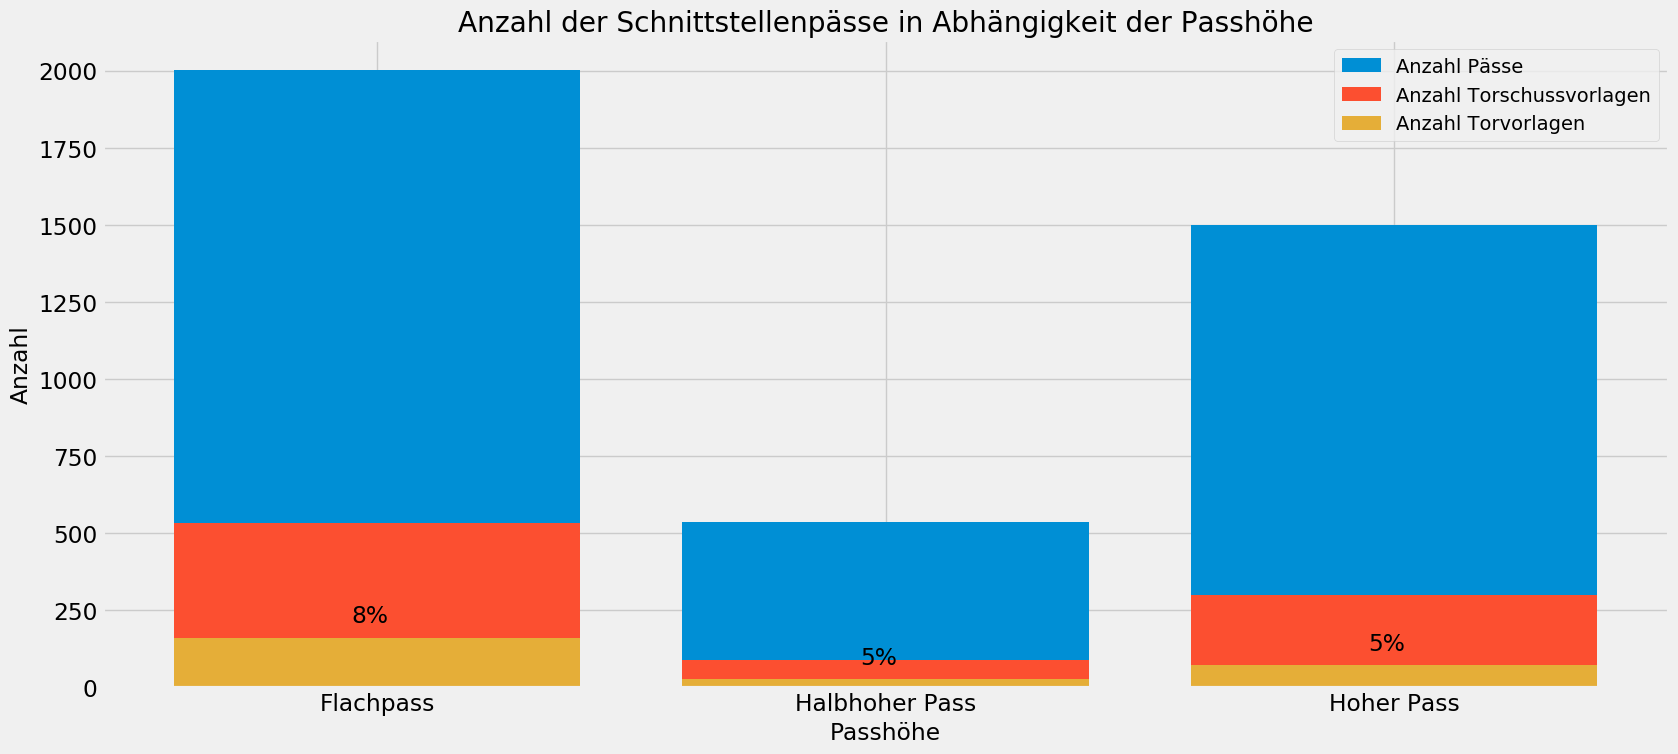

In [13]:
# Schnittstellenpässe in Abhängigkeit der Passhöhe
situations = ['Ground Pass', 'Low Pass', 'High Pass']
through_balls = open_passes[open_passes['Through Ball'] == 1]
shot_assists = through_balls[(through_balls['shot_assist'] == 1) | (through_balls['goal_assist'] == 1)]
goal_assists = through_balls[through_balls['goal_assist'] == 1]
num_passes = [len(through_balls[through_balls[situation] == 1]) for situation in situations]
num_shot_assists = [len(shot_assists[shot_assists[situation] == 1]) for situation in situations]
num_goal_assists = [len(goal_assists[goal_assists[situation] == 1]) for situation in situations]
pct_scored = [int(np.round(100 * num_goal_assists[i] / num_passes[i])) for i in range(len(num_passes))]
plt.figure(figsize=(18,8))
x_labels = ['Flachpass', 'Halbhoher Pass', 'Hoher Pass']
plt.bar(x=x_labels, height=num_passes, label='Anzahl Pässe')
plt.bar(x=x_labels, height=num_shot_assists, label='Anzahl Torschussvorlagen')
plt.bar(x=x_labels, height=num_goal_assists, label='Anzahl Torvorlagen')
for i in range(len(situations)):
    plt.text(i - 0.05, num_goal_assists[i] + 50, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Schnittstellenpässe in Abhängigkeit der Passhöhe')
plt.xlabel('Passhöhe')
plt.ylabel('Anzahl')
plt.legend()
plt.show()

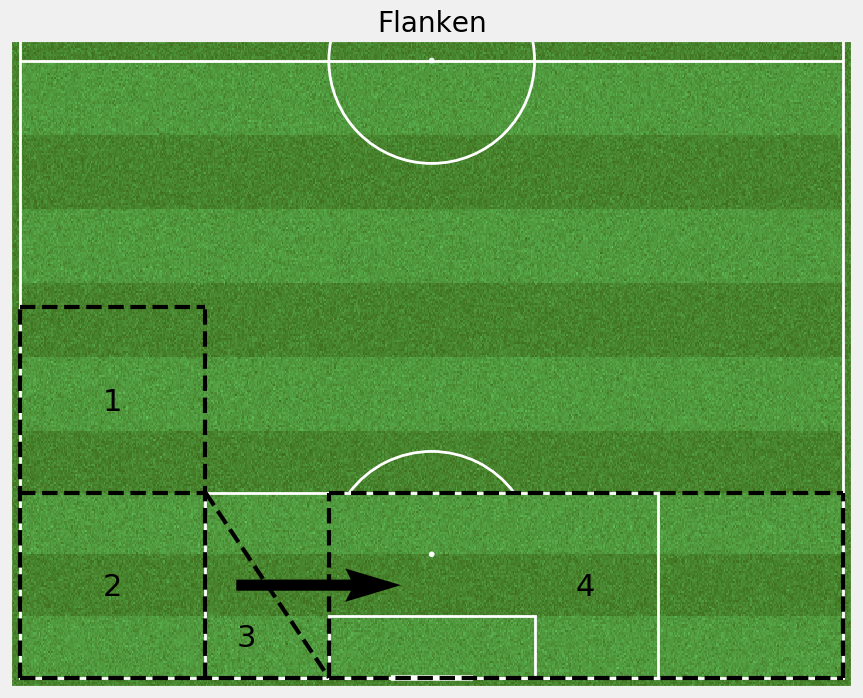

In [76]:
# Diagramm zu Flanken
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, 
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.vlines(0,0,36,linestyle='--', linewidth=3)
ax.vlines(18,0,36,linestyle='--', linewidth=3)
ax.vlines(30,0,18,linestyle='--', linewidth=3)
ax.vlines(80,0,18,linestyle='--', linewidth=3)
ax.hlines(36,0,18,linestyle='--', linewidth=3)
ax.hlines(18,0,18,linestyle='--', linewidth=3)
ax.hlines(0,0,80,linestyle='--', linewidth=3)
ax.hlines(18,30,80,linestyle='--', linewidth=3)
ax.plot([18,30], [18,0], linestyle='--', linewidth=3, color='black')
ax.text(8,26,'1',color='k',fontsize=22)
ax.text(8,8,'2',color='k',fontsize=22)
ax.text(21,3,'3',color='k',fontsize=22)
ax.text(54,8,'4',color='k',fontsize=22)
pitch.arrows(9,21,9,37,ax=ax,width=8)
plt.ylim(-1,62)
plt.xlim(-1,81)
plt.title('Flanken')
plt.show()

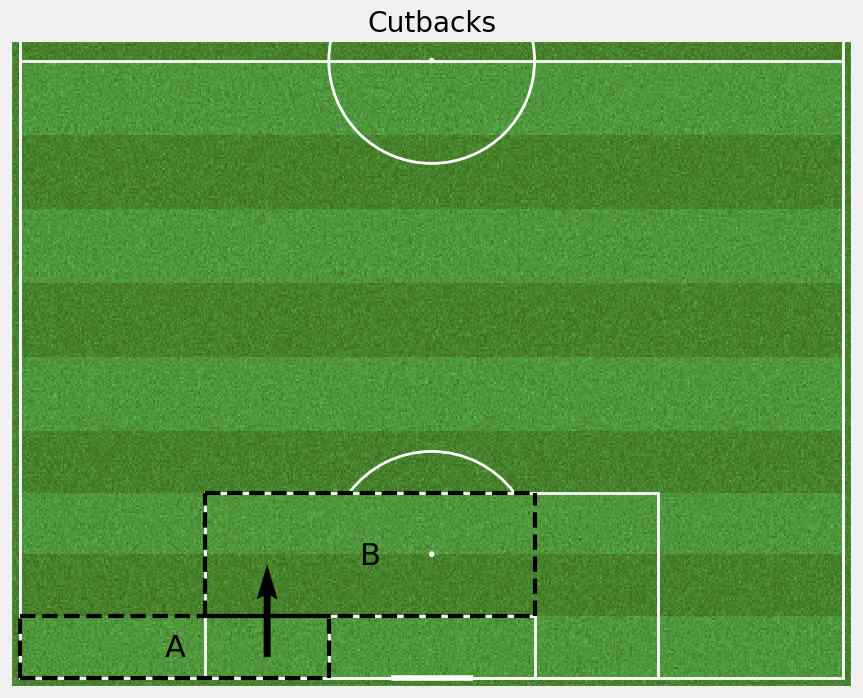

In [80]:
# Diagramm zu Cutbacks
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, 
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.vlines(0,0,6,linestyle='--', linewidth=3)
ax.vlines(30,0,6,linestyle='--', linewidth=3)
ax.vlines(18,6,18,linestyle='--', linewidth=3)
ax.vlines(50,6,18,linestyle='--', linewidth=3)
ax.hlines(0,0,30,linestyle='--', linewidth=3)
ax.hlines(6,0,30,linestyle='--', linewidth=3)
ax.hlines(6,18,50,linestyle='--', linewidth=3)
ax.hlines(18,18,50,linestyle='--', linewidth=3)
ax.text(14,2,'A',color='k',fontsize=22)
ax.text(33,11,'B',color='k',fontsize=22)
pitch.arrows(2,24,11,24,ax=ax,width=5)
plt.ylim(-1,62)
plt.xlim(-1,81)
plt.title('Cutbacks')
plt.show()

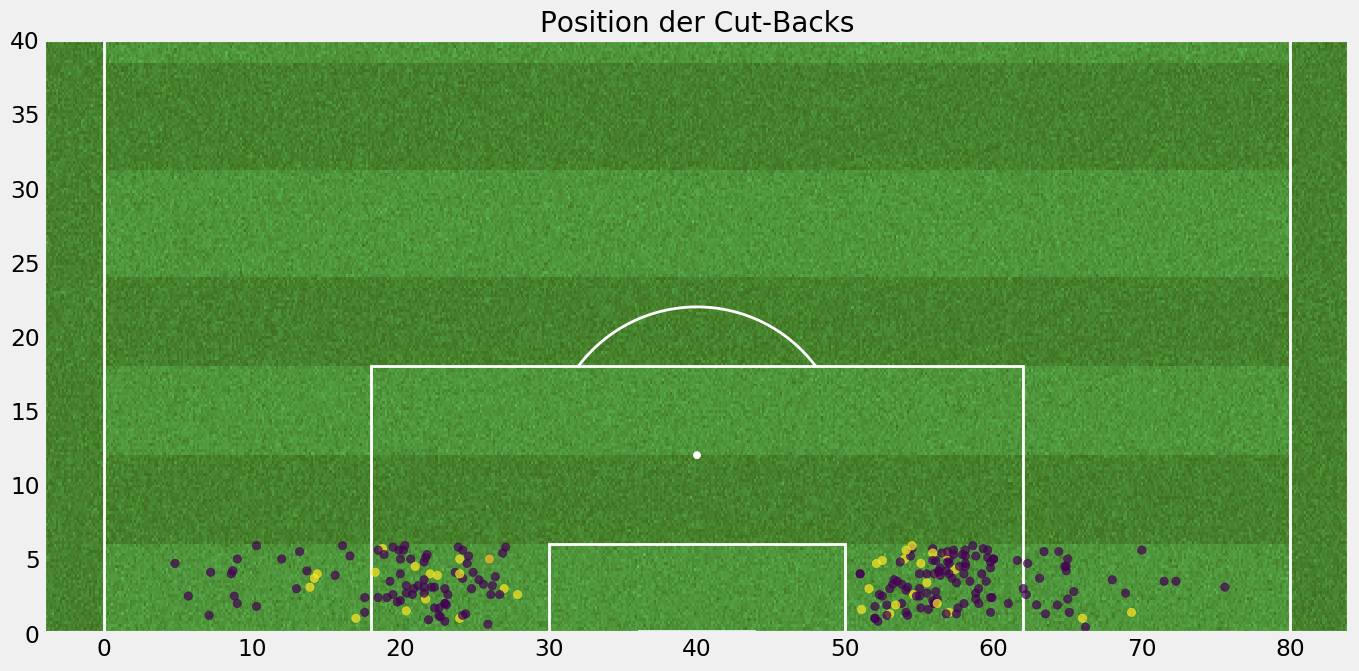

In [14]:
shot_assists = open_passes[(open_passes['shot_assist'] == 1) | (open_passes['goal_assist'] == 1)]
cut_backs = shot_assists[shot_assists['cut_back'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-cut_backs['location_y'], 120-cut_backs['location_x'], c=cut_backs['goal_assist'], alpha=0.7)
plt.ylim(0,40)
plt.title('Position der Cut-Backs')
plt.show()

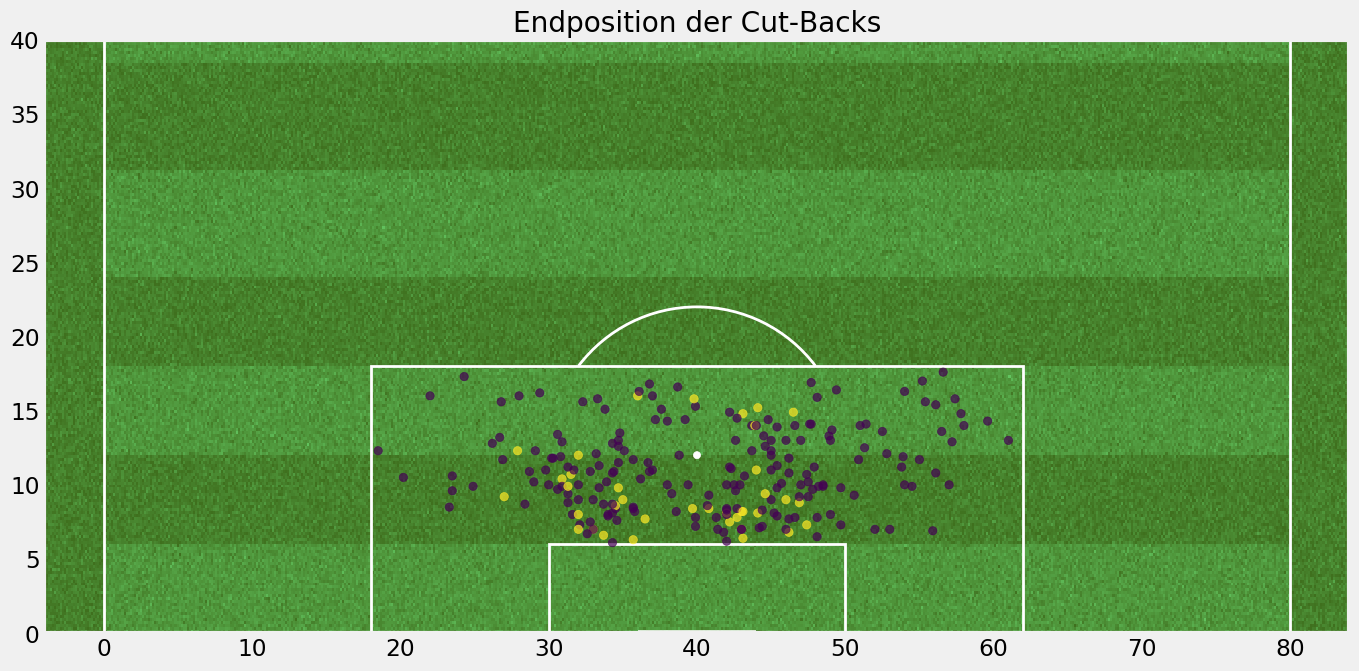

In [15]:
cut_backs = shot_assists[shot_assists['cut_back'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-cut_backs['end_location_y'], 120-cut_backs['end_location_x'], c=cut_backs['goal_assist'], alpha=0.7)
plt.ylim(0,40)
plt.title('Endposition der Cut-Backs')
plt.show()

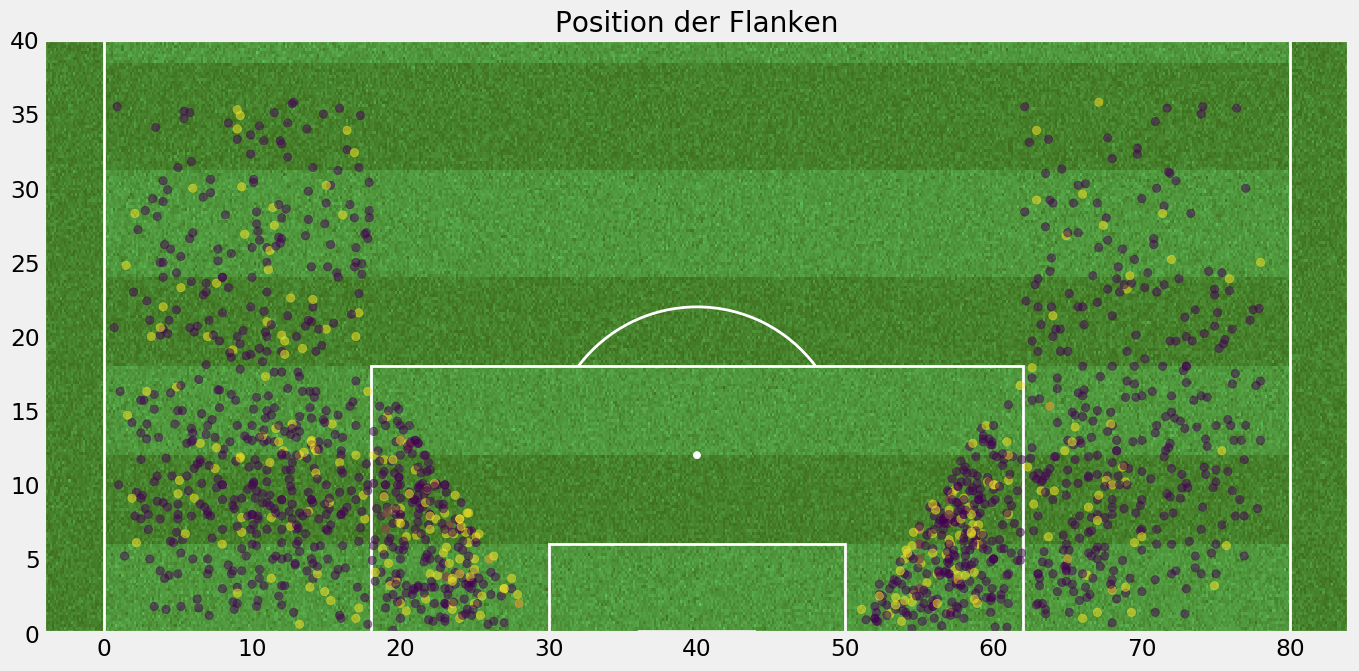

In [57]:
crosses = shot_assists[shot_assists['cross'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-crosses['location_y'], 120-crosses['location_x'], c=crosses['goal_assist'], alpha=0.5)
plt.ylim(0,40)
plt.title('Position der Flanken')
plt.show()

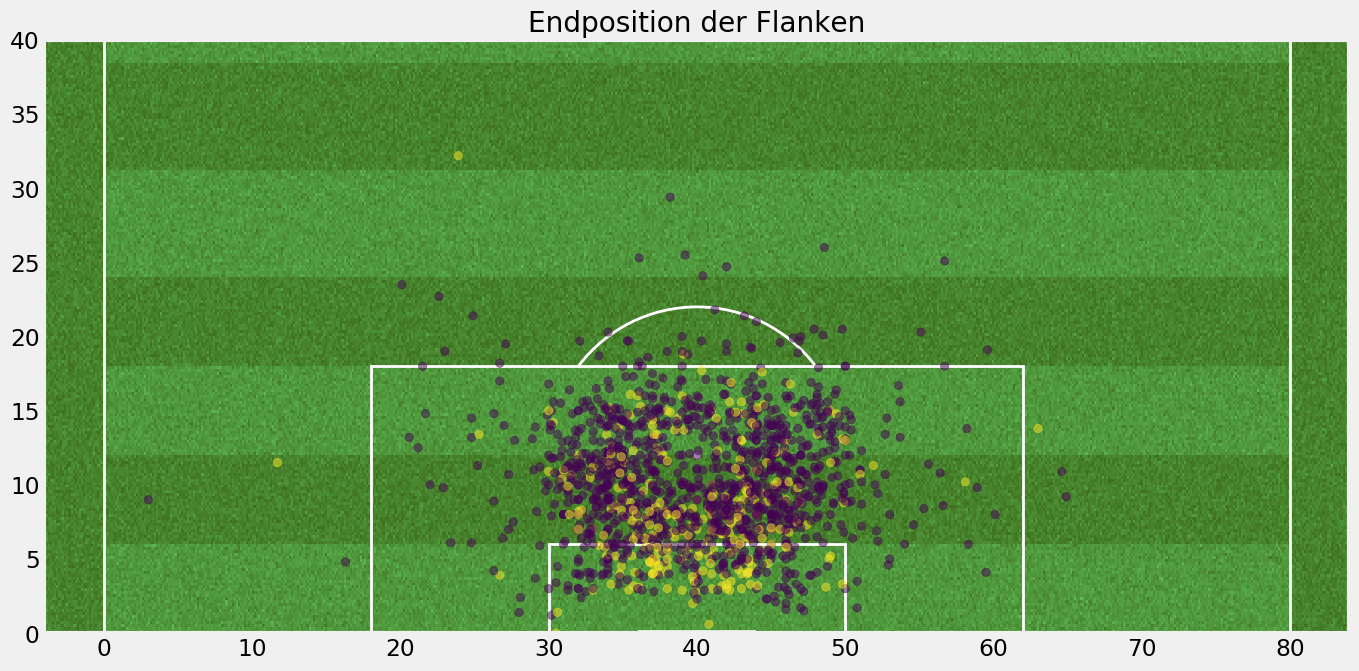

In [17]:
crosses = shot_assists[shot_assists['cross'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-crosses['end_location_y'], 120-crosses['end_location_x'], c=crosses['goal_assist'], alpha=0.5)
plt.ylim(0,40)
plt.title('Endposition der Flanken')
plt.show()

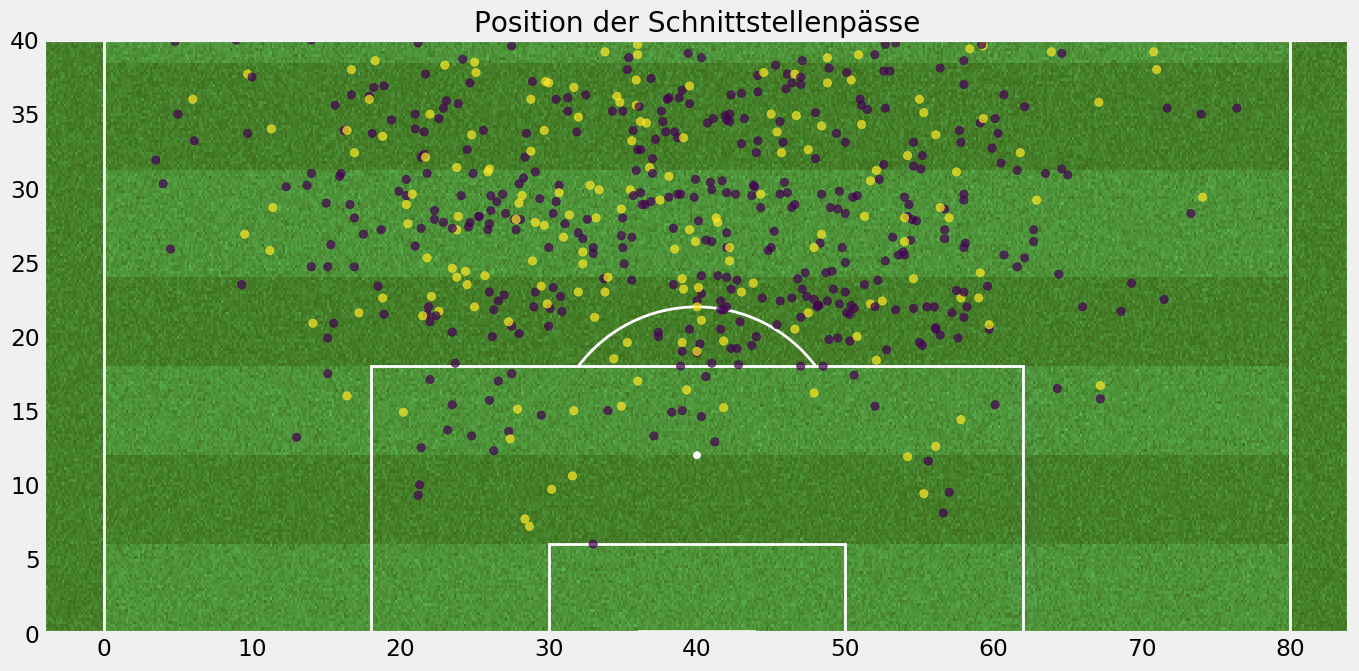

In [18]:
through_balls = shot_assists[shot_assists['Through Ball'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-through_balls['location_y'], 120-through_balls['location_x'], c=through_balls['goal_assist'], alpha=0.7)
plt.ylim(0,40)
plt.title('Position der Schnittstellenpässe')
plt.show()

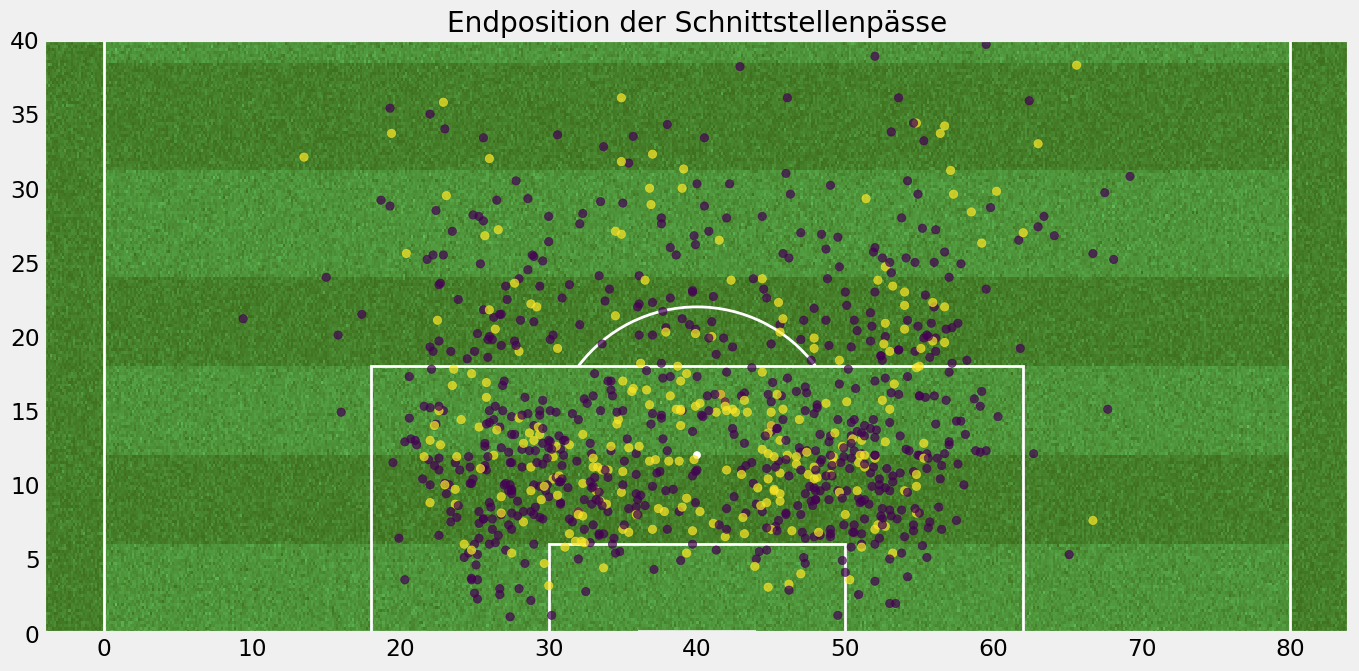

In [19]:
through_balls = shot_assists[shot_assists['Through Ball'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-through_balls['end_location_y'], 120-through_balls['end_location_x'], c=through_balls['goal_assist'], alpha=0.7)
plt.ylim(0,40)
plt.title('Endposition der Schnittstellenpässe')
plt.show()

Analyse von Standardsituationen

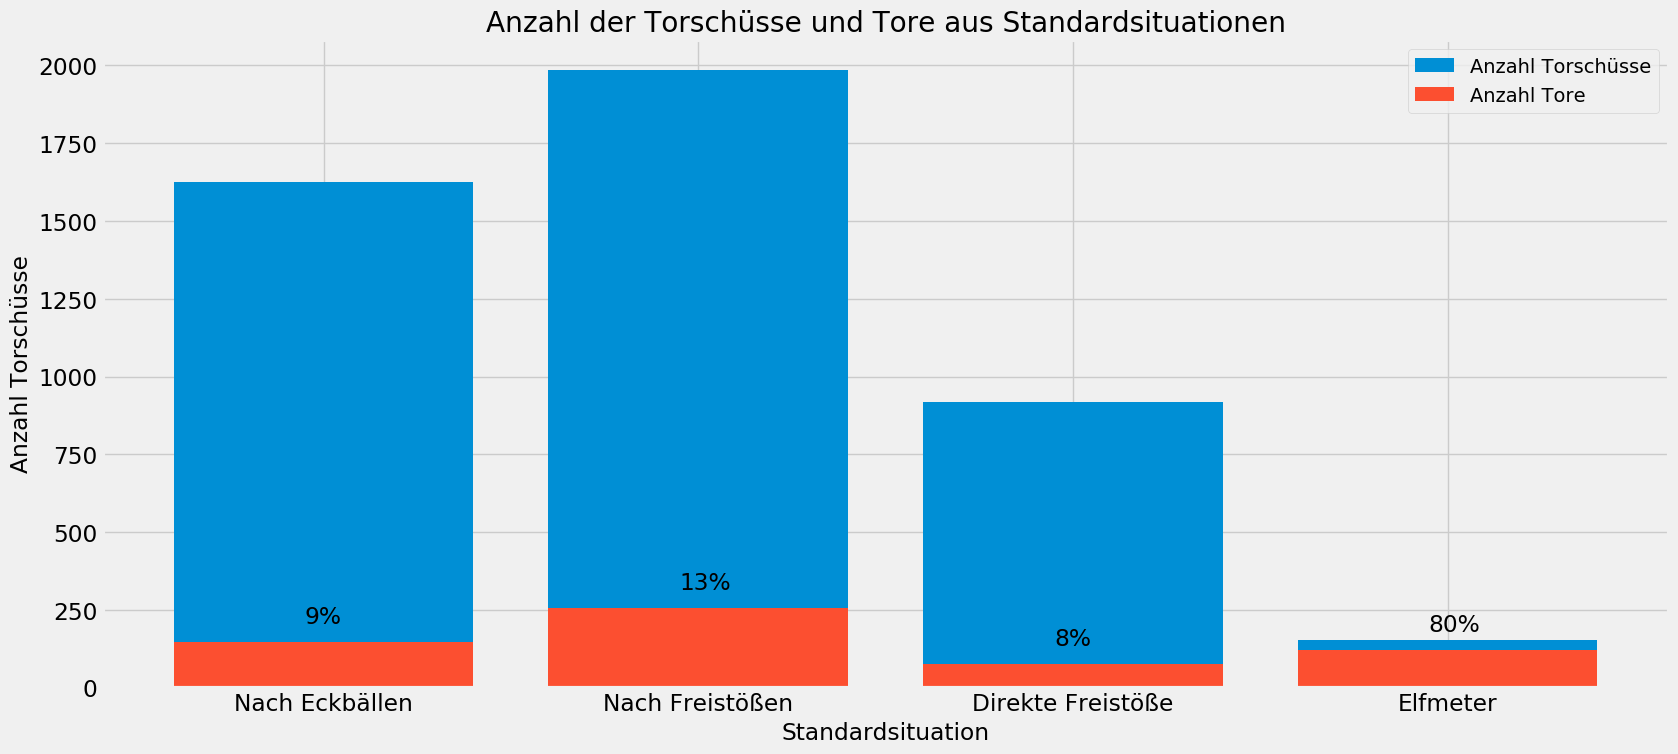

In [20]:
# Torschüsse und Tore in Abhängigkeit der Spielsituation
situations = ['from_corner', 'from_free_kick', 'free_kick', 'penalty'] 
x_labels = ['Nach Eckbällen', 'Nach Freistößen', 'Direkte Freistöße', 'Elfmeter']
goals = shots[shots['goal'] == 1]
num_goals = [len(goals[goals[situation] == 1]) if situation != 'from_free_kick' else len(goals[(goals['from_free_kick'] == 1) & (goals['free_kick'] == 0)]) for situation in situations]
num_shots = [len(shots[shots[situation] == 1]) if situation != 'from_free_kick' else len(shots[(shots['from_free_kick'] == 1) & (shots['free_kick'] == 0)]) for situation in situations]
pct_scored = [int(np.round(100 * num_goals[i] / num_shots[i])) for i in range(len(num_shots))]
plt.figure(figsize=(18,8))
plt.bar(x=x_labels, height=num_shots, label='Anzahl Torschüsse')
plt.bar(x=x_labels, height=num_goals, label='Anzahl Tore')
for i in range(len(situations)):
    plt.text(i - 0.05, num_goals[i] + 60, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Torschüsse und Tore aus Standardsituationen')
plt.xlabel('Standardsituation')
plt.ylabel('Anzahl Torschüsse')
plt.legend()
plt.show()

In [21]:
goals = shots[shots['goal'] == 1]
len(goals[(goals['from_corner'] == 1) | (goals['free_kick'] == 1) | (goals['from_free_kick'] == 1) | (goals['penalty'] == 1)]) / len(goals)

0.3641337386018237

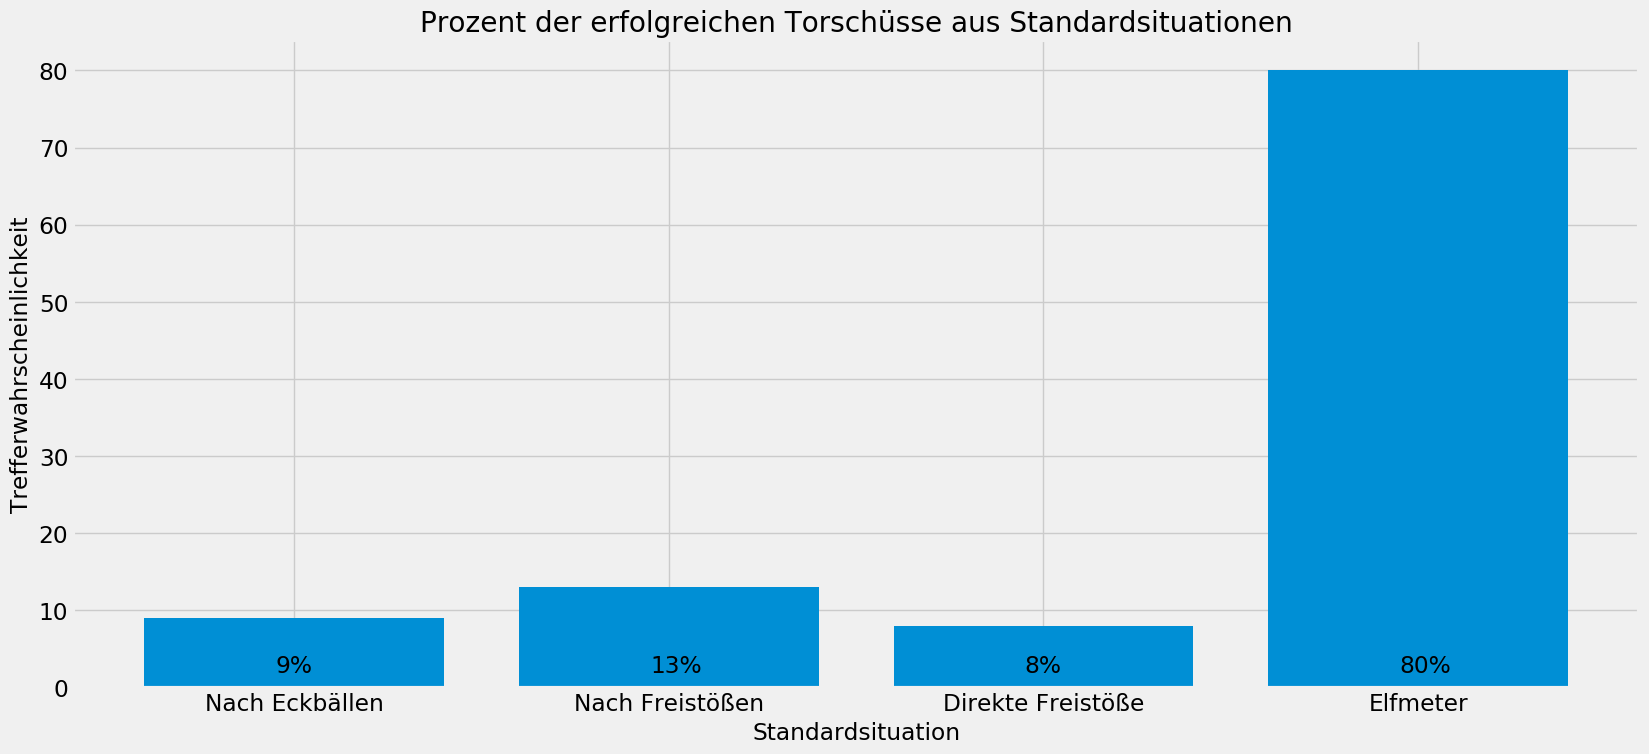

In [22]:
plt.figure(figsize=(18,8))
plt.bar(x=x_labels, height=pct_scored)
for i in range(len(situations)):
    plt.text(i - 0.05, 2, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Prozent der erfolgreichen Torschüsse aus Standardsituationen')
plt.xlabel('Standardsituation')
plt.ylabel('Trefferwahrscheinlichkeit')
plt.show()

Analyse von Eckbällen

In [23]:
goals_from_corner = goals[goals['from_corner'] == 1]
goals_from_corner.head()

duration  match_id  minute  second  under_pressure  pass_height  \
26   0.474284      9592      86      17               1            3   
81   0.483000      9609      37      11               0            3   
170  0.722050      9860      87      18               0            1   
281  0.760300      9673      58      42               1            3   
461  0.654826      9880      50      39               1            3   

     assistant_id  location_x  location_y  team_id  player_id  goalkeeper_id  \
26           5470       115.5        41.4      217       5213           6792   
81           6609       113.5        39.3      217       5542           6698   
170            -1       116.2        35.0      217       5246           6823   
281          5504       110.8        35.0      213       6715          20055   
461          3501       113.5        43.8      217       5492           6590   

     goal  statsbomb_xg  first_touch  follows_dribble  foot_shot  header  \
26      1      0.231925            0                0          0       1   
81      1      0.159875            0                0          0       1   
170     1      0.290879            0                0          1       0   
281     1      0.065550            0                0          0       1   
461     1      0.170955            0                0          0       1   

     open_goal  defender  midfielder  striker  goal_distance  regular_play  \
26           0         1           0        0       4.712749             0   
81           0         0           1        0       6.537584             0   
170          1         0           0        1       6.280127             0   
281          0         0           1        0      10.470912             0   
461          0         1           0        0       7.529276             0   

     from_corner  from_free_kick  from_throw_in  from_counter  from_pressing  \
26             1               0              0             0              0   
81             1               0              0             0              0   
170            1               0              0             0              0   
281            1               0              0             0              0   
461            1               0              0             0              0   

     from_goal_kick  from_keeper  from_kick_off  backheel  diving_header  \
26                0            0              0         0              0   
81                0            0              0         0              0   
170               0            0              0         0              0   
281               0            0              0         0              0   
461               0            0              0         0              0   

     half_volley  lob  overhead_kick  volley  corner  free_kick  open_play  \
26             0    0              0       0       0          0          1   
81             0    0              0       0       0          0          1   
170            1    0              0       0       0          0          1   
281            0    0              0       0       0          0          1   
461            0    0              0       0       0          0          1   

     penalty  kick_off  goal_angle  num_teammates  num_opposition  gk_in_goal  \
26         0         0   80.212796              0               1           1   
81         0         0   62.786378              0               1           1   
170        0         0   52.365886              0               1           1   
281        0         0   38.166953              0               2           1   
461        0         0   51.956820              0               2           1   

      pred_xg  goal_distance_m  
26   0.179448         4.123655  
81   0.198030         5.720386  
170  0.681691         5.495111  
281  0.053722         9.162048  
461  0.095217         6.588117

In [24]:
print('Anzahl')
print('Tore nach Eckbällen: ' + str(len(goals_from_corner)))
print('Alle Tore: ' + str(len(goals)))
print('Alle Torschüsse: ' + str(len(shots)))

Anzahl
Tore nach Eckbällen: 147
Alle Tore: 1645
Alle Torschüsse: 12003


In [25]:
print('Anteil der Kopfbälle')
print('Tore nach Eckbällen: ' + str(np.round(100*goals_from_corner['header'].mean(), 2)) + '%')
print('Alle Tore: ' + str(np.round(100*goals['header'].mean(), 2)) + '%')
print('Alle Torschüsse: ' + str(np.round(100*shots['header'].mean(), 2)) + '%')

Anteil der Kopfbälle
Tore nach Eckbällen: 36.73%
Alle Tore: 9.85%
Alle Torschüsse: 12.56%


In [26]:
print('Durchschnittliche Passhöhe')
print('Tore nach Eckbällen: ' + str(np.round(goals_from_corner['pass_height'].mean(), 2)))
print('Alle Tore: ' + str(np.round(goals['pass_height'].mean(), 2)))
print('Alle Torschüsse: ' + str(np.round(shots['pass_height'].mean(), 2)))

Durchschnittliche Passhöhe
Tore nach Eckbällen: 1.95
Alle Tore: 1.46
Alle Torschüsse: 1.54


In [27]:
print('Anteil an Verteidigern')
print('Tore nach Eckbällen: ' + str(np.round(100*goals_from_corner['defender'].mean(), 2)) + '%')
print('Alle Tore: ' + str(np.round(100*goals['defender'].mean(), 2)) + '%')
print('Alle Torschüsse: ' + str(np.round(100*shots['defender'].mean(), 2)) + '%')

Anteil an Verteidigern
Tore nach Eckbällen: 34.69%
Alle Tore: 8.94%
Alle Torschüsse: 13.49%


In [28]:
print('Durchschnittliche Torentfernung')
print('Tore nach Eckbällen: ' + str(np.round(goals_from_corner['goal_distance_m'].mean(), 2)))
print('Alle Tore: ' + str(np.round(goals['goal_distance_m'].mean(), 2)))
print('Alle Torschüsse: ' + str(np.round(shots['goal_distance_m'].mean(), 2)))

Durchschnittliche Torentfernung
Tore nach Eckbällen: 8.97
Alle Tore: 11.66
Alle Torschüsse: 16.8


In [29]:
print('Durchschnittlicher Schusswinkel')
print('Tore nach Eckbällen: ' + str(np.round(goals_from_corner['goal_angle'].mean(), 2)))
print('Alle Tore: ' + str(np.round(goals['goal_angle'].mean(), 2)))
print('Alle Torschüsse: ' + str(np.round(shots['goal_angle'].mean(), 2)))

Durchschnittlicher Schusswinkel
Tore nach Eckbällen: 48.04
Alle Tore: 36.83
Alle Torschüsse: 24.67


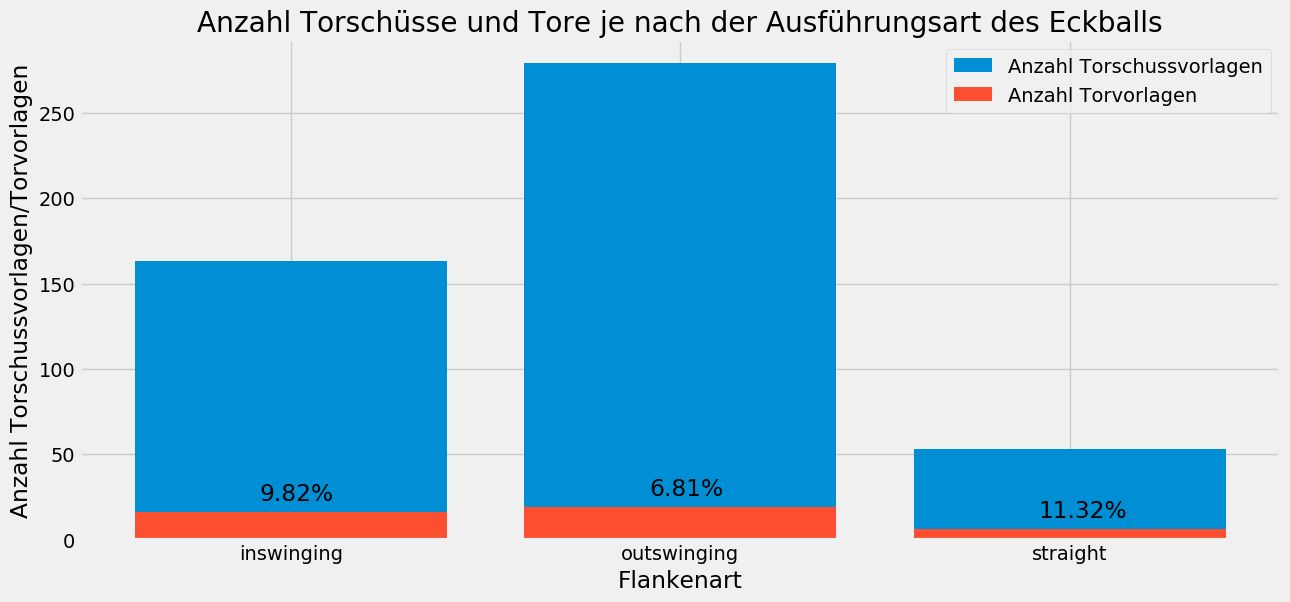

In [276]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
features = ['inswinging', 'outswinging', 'straight']
num_shots = [passes.loc[passes[feature] == 1, 'shot_assist'].sum() for feature in features]
num_goals = [passes.loc[passes[feature] == 1, 'goal_assist'].sum() for feature in features]
pct_scored = [np.round(100 * num_goals[i] / num_shots[i], 2) for i in range(len(num_shots))]
ax.bar(x=features, height=num_shots, label='Anzahl Torschussvorlagen')
ax.bar(x=features, height=num_goals, label='Anzahl Torvorlagen')
for i in range(len(features)):
    plt.text(i - 0.08, num_goals[i] + 7, str(pct_scored[i]) + '%', fontsize='large')
plt.xticks(features)
plt.title('Anzahl Torschüsse und Tore je nach der Ausführungsart des Eckballs')
plt.ylabel('Anzahl Torschussvorlagen/Torvorlagen')
plt.xlabel('Flankenart')
plt.legend()
plt.show()

In [30]:
passes.loc[passes['inswinging'] == 1, 'end_location_x'].mean()

114.54586129753902

In [31]:
passes.loc[passes['outswinging'] == 1, 'end_location_x'].mean()

110.2156934306571

In [32]:
passes.loc[passes['straight'] == 1, 'end_location_x'].mean()

111.91260997067448

In [182]:
len(passes[passes['inswinging'] == 1])

1341

In [183]:
len(passes[passes['outswinging'] == 1])

1370

In [184]:
len(passes[passes['straight'] == 1])

341

In [281]:
passes.loc[passes['inswinging'] == 1, 'goal_assist'].sum() / passes['inswinging'].sum()

0.011931394481730051

In [282]:
passes.loc[passes['outswinging'] == 1, 'goal_assist'].sum() / passes['outswinging'].sum()

0.013868613138686132

In [284]:
passes.loc[passes['straight'] == 1, 'goal_assist'].sum() / passes['straight'].sum()

0.017595307917888565

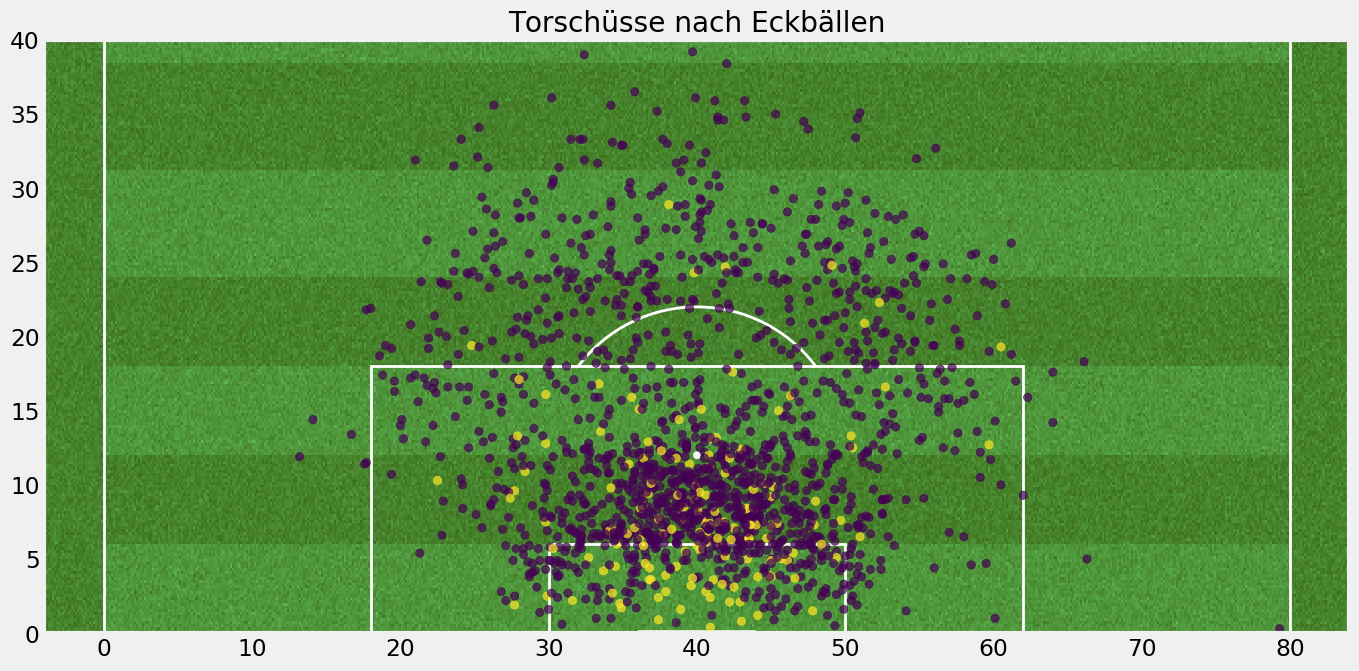

In [31]:
from_corner = shots[shots['from_corner'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-from_corner['location_y'], 120-from_corner['location_x'], c=from_corner['goal'], alpha=0.7)
plt.ylim(0,40)
plt.title('Torschüsse nach Eckbällen')
plt.show()

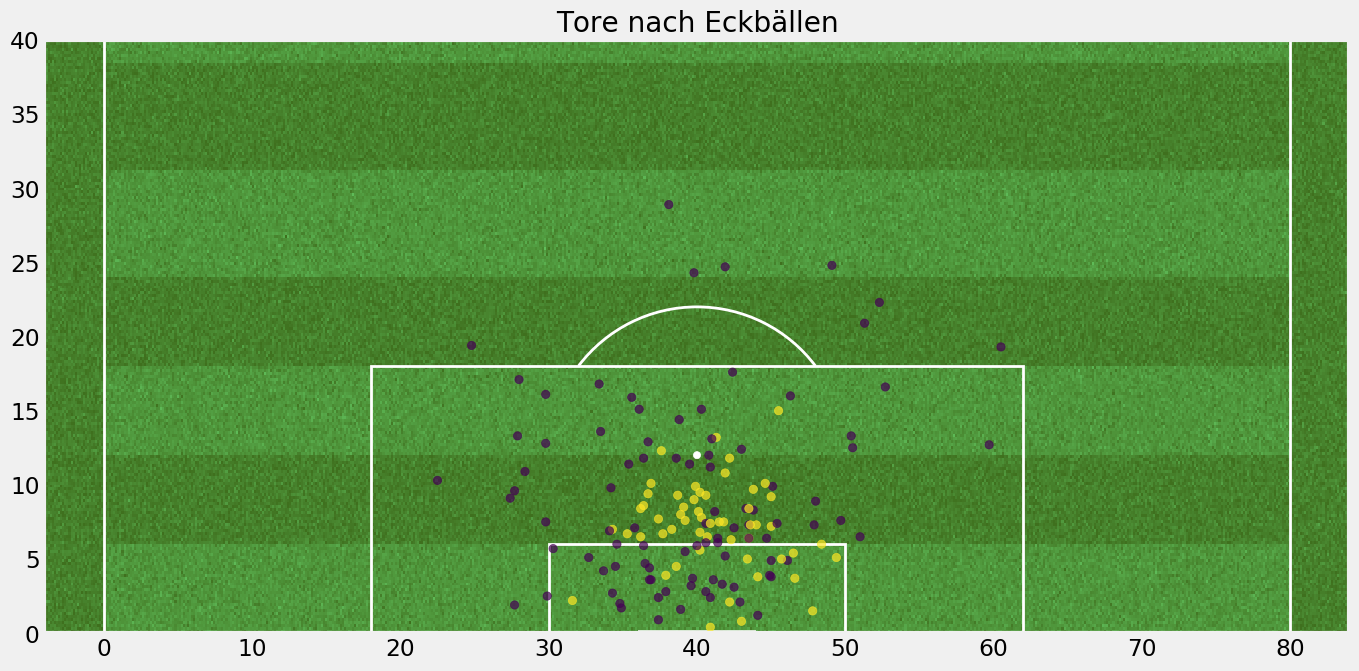

In [32]:
from_corner = goals[goals['from_corner'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-from_corner['location_y'], 120-from_corner['location_x'], c=from_corner['header'], alpha=0.7)
plt.ylim(0,40)
plt.title('Tore nach Eckbällen')
plt.show()

Analyse von Freistößen

In [33]:
goals_from_freekicks = goals[(goals['from_free_kick'] == 1) & (goals['free_kick'] == 0)]
goals_freekicks = goals[goals['free_kick'] == 1]
goals_from_freekicks.head()

duration  match_id  minute  second  under_pressure  pass_height  \
71   2.255000      9783      81      53               1            3   
186  0.631000      9695      59      20               0            1   
189  0.777000      9695      81      50               0            3   
394  0.567599      9912      39      31               0            1   
592  1.199307      9602      38      46               0            3   

     assistant_id  location_x  location_y  team_id  player_id  goalkeeper_id  \
71           5503       111.7        38.3      217       5213           6768   
186          6596       117.1        38.1      207       5718          20055   
189          5503       114.0        34.0      217       5211           6590   
394          6774       109.5        39.7      219       6732          20055   
592          6633        99.8        33.3      216       5693          20055   

     goal  statsbomb_xg  first_touch  follows_dribble  foot_shot  header  \
71      1      0.134778            0                0          0       1   
186     1      0.706626            0                0          1       0   
189     1      0.201310            0                0          1       0   
394     1      0.130447            1                0          1       0   
592     1      0.062080            1                0          1       0   

     open_goal  defender  midfielder  striker  goal_distance  regular_play  \
71           0         1           0        0       8.472308             0   
186          1         0           0        1       3.466987             0   
189          0         1           0        0       8.485281             0   
394          0         0           0        1      10.504285             0   
592          0         0           1        0      21.282152             0   

     from_corner  from_free_kick  from_throw_in  from_counter  from_pressing  \
71             0               1              0             0              0   
186            0               1              0             0              0   
189            0               1              0             0              0   
394            0               1              0             0              0   
592            0               1              0             0              0   

     from_goal_kick  from_keeper  from_kick_off  backheel  diving_header  \
71                0            0              0         0              0   
186               0            0              0         0              0   
189               0            0              0         0              0   
394               0            0              0         0              0   
592               0            0              0         0              0   

     half_volley  lob  overhead_kick  volley  corner  free_kick  open_play  \
71             0    0              0       0       0          0          1   
186            0    0              0       0       0          0          1   
189            0    0              0       1       0          0          1   
394            0    0              0       0       0          0          1   
592            0    0              0       1       0          0          1   

     penalty  kick_off  goal_angle  num_teammates  num_opposition  gk_in_goal  \
71         0         0   49.967717              0               1           1   
186        0         0   99.734433              0               1           1   
189        0         0   40.601295              0               1           1   
394        0         0   41.681755              0               2           1   
592        0         0   20.297080              1               2           1   

      pred_xg  goal_distance_m  
71   0.167623         7.413269  
186  0.827982         3.033614  
189  0.268745         7.424621  
394  0.270773         9.191249  
592  0.073468        18.621883

In [34]:
print('Anzahl')
print('Tore nach Freistößen: ' + str(len(goals_from_freekicks)))
print('Tore nach direkten Freistößen: ' + str(len(goals_freekicks)))
print('Alle Tore: ' + str(len(goals)))
print('Alle Torschüsse: ' + str(len(shots)))

Anzahl
Tore nach Freistößen: 256
Tore nach direkten Freistößen: 75
Alle Tore: 1645
Alle Torschüsse: 12003


In [35]:
print('Anteil der Kopfbälle')
print('Tore nach Freistößen: ' + str(np.round(100*goals_from_freekicks['header'].mean(), 2)) + '%')
print('Tore nach direkten Freistößen: ' + str(np.round(100*goals_freekicks['header'].mean(), 2)) + '%')
print('Alle Tore: ' + str(np.round(100*goals['header'].mean(), 2)) + '%')
print('Alle Torschüsse: ' + str(np.round(100*shots['header'].mean(), 2)) + '%')

Anteil der Kopfbälle
Tore nach Freistößen: 19.14%
Tore nach direkten Freistößen: 0.0%
Alle Tore: 9.85%
Alle Torschüsse: 12.56%


In [36]:
print('Durchschnittliche Passhöhe')
print('Tore nach Freistößen: ' + str(np.round(goals_from_freekicks['pass_height'].mean(), 2)))
print('Tore nach direktenFreistößen: ' + str(np.round(goals_freekicks['pass_height'].mean(), 2)))
print('Alle Tore: ' + str(np.round(goals['pass_height'].mean(), 2)))
print('Alle Torschüsse: ' + str(np.round(shots['pass_height'].mean(), 2)))

Durchschnittliche Passhöhe
Tore nach Freistößen: 1.62
Tore nach direktenFreistößen: 1.0
Alle Tore: 1.46
Alle Torschüsse: 1.54


In [37]:
print('Anteil an Verteidigern')
print('Tore nach Freistößen: ' + str(np.round(100*goals_from_freekicks['defender'].mean(), 2)) + '%')
print('Tore nach direkten Freistößen: ' + str(np.round(100*goals_freekicks['defender'].mean(), 2)) + '%')
print('Alle Tore: ' + str(np.round(100*goals['defender'].mean(), 2)) + '%')
print('Alle Torschüsse: ' + str(np.round(100*shots['defender'].mean(), 2)) + '%')

Anteil an Verteidigern
Tore nach Freistößen: 12.89%
Tore nach direkten Freistößen: 8.0%
Alle Tore: 8.94%
Alle Torschüsse: 13.49%


In [38]:
print('Durchschnittliche Torentfernung')
print('Tore nach Freistößen: ' + str(np.round(goals_from_freekicks['goal_distance_m'].mean(), 2)))
print('Tore nach direkten Freistößen: ' + str(np.round(goals_freekicks['goal_distance_m'].mean(), 2)))
print('Alle Tore: ' + str(np.round(goals['goal_distance_m'].mean(), 2)))
print('Alle Torschüsse: ' + str(np.round(shots['goal_distance_m'].mean(), 2)))

Durchschnittliche Torentfernung
Tore nach Freistößen: 10.54
Tore nach direkten Freistößen: 23.82
Alle Tore: 11.66
Alle Torschüsse: 16.8


In [39]:
print('Durchschnittlicher Schusswinkel')
print('Tore nach Freistößen: ' + str(np.round(goals_from_freekicks['goal_angle'].mean(), 2)))
print('Tore nach direkten Freistößen: ' + str(np.round(goals_freekicks['goal_angle'].mean(), 2)))
print('Alle Tore: ' + str(np.round(goals['goal_angle'].mean(), 2)))
print('Alle Torschüsse: ' + str(np.round(shots['goal_angle'].mean(), 2)))

Durchschnittlicher Schusswinkel
Tore nach Freistößen: 39.92
Tore nach direkten Freistößen: 15.78
Alle Tore: 36.83
Alle Torschüsse: 24.67


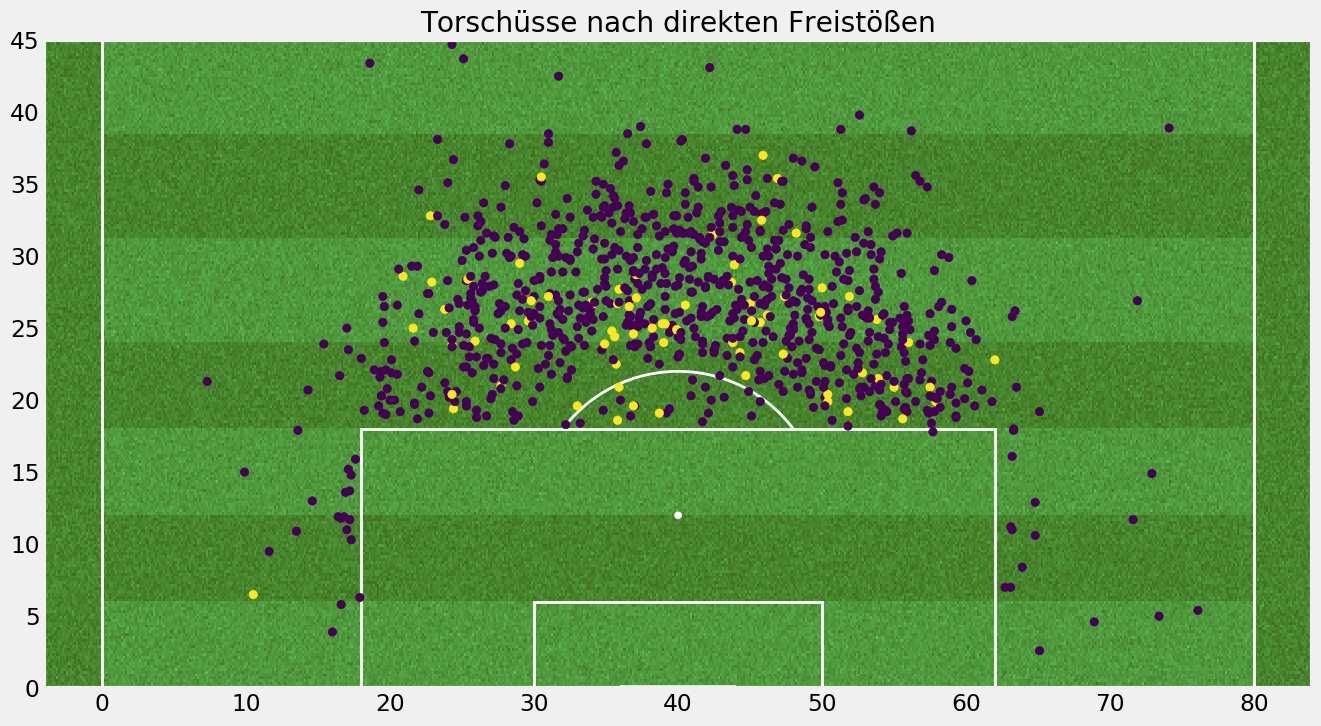

In [40]:
free_kicks = shots[shots['free_kick'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-free_kicks['location_y'], 120-free_kicks['location_x'], c=free_kicks['goal'])
plt.ylim(0,45)
plt.title('Torschüsse nach direkten Freistößen')
plt.show()

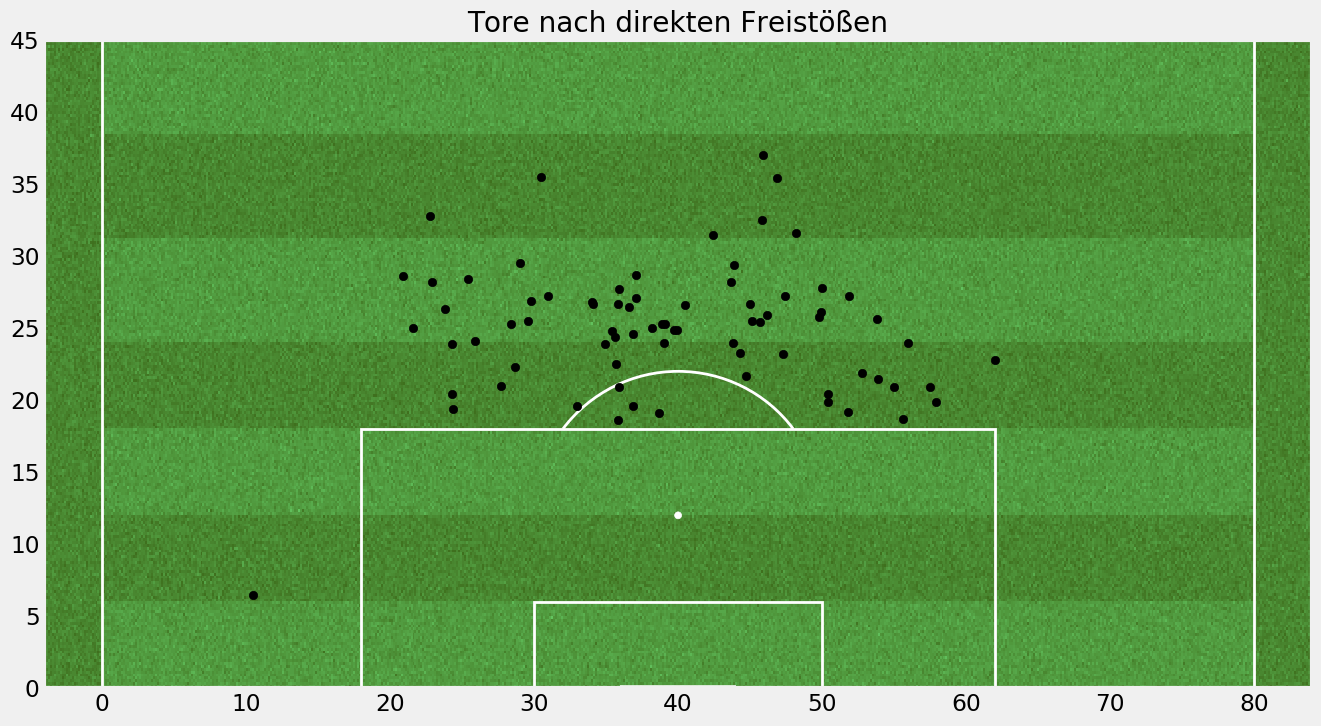

In [41]:
free_kicks = shots[(shots['free_kick'] == 1) & (shots['goal'] == 1)]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-free_kicks['location_y'], 120-free_kicks['location_x'], color='black')
plt.ylim(0,45)
plt.title('Tore nach direkten Freistößen')
plt.show()

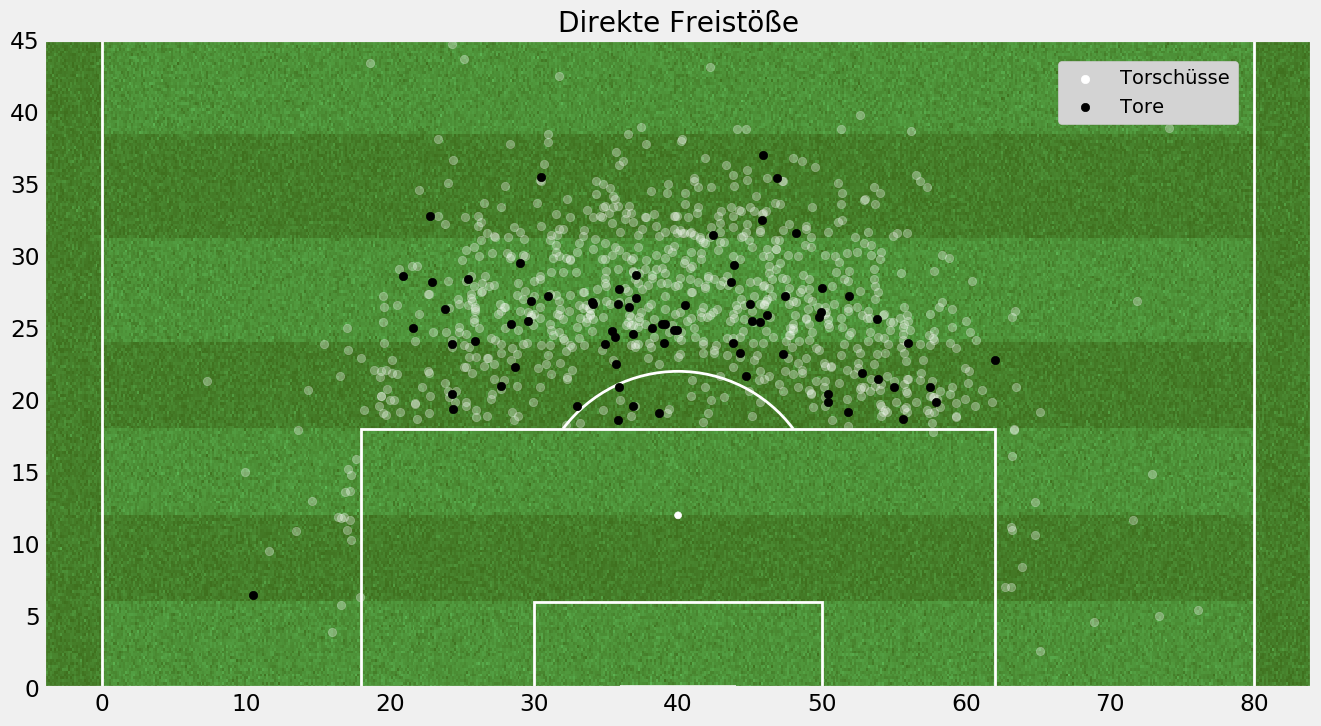

In [42]:
free_kicks_shots = shots[(shots['free_kick'] == 1) & (shots['goal'] == 0)]
free_kicks_goals = shots[(shots['free_kick'] == 1) & (shots['goal'] == 1)]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-free_kicks_shots['location_y'], 120-free_kicks_shots['location_x'], color='white', alpha=0.3, label='Torschüsse')
ax.scatter(80-free_kicks_goals['location_y'], 120-free_kicks_goals['location_x'], color='black', label='Tore')
plt.ylim(0,45)
plt.title('Direkte Freistöße')
leg = plt.legend(loc=(0.8,0.87), facecolor='lightgray', framealpha=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

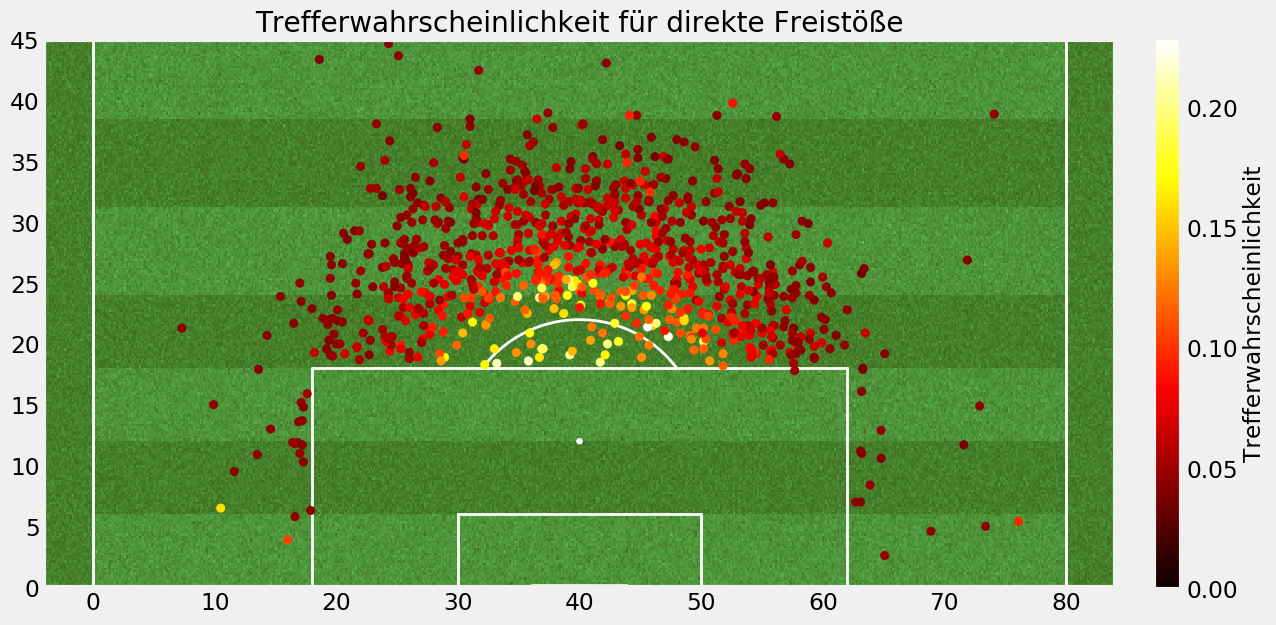

In [43]:
free_kicks_shots = shots[(shots['free_kick'] == 1) & (shots['pred_xg'] < 0.27)]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
m = ax.scatter(80-free_kicks_shots['location_y'], 120-free_kicks_shots['location_x'], c=free_kicks_shots['pred_xg'], cmap='hot')
cbar = plt.colorbar(m, label='Trefferwahrscheinlichkeit', shrink=0.85, pad=0.03)
cbar.set_clim(vmin=0, vmax=free_kicks_shots['pred_xg'].max())
cbar.solids.set_edgecolor("face")
cbar.set_alpha(1)
cbar.draw_all()
plt.ylim(0,45)
plt.title('Trefferwahrscheinlichkeit für direkte Freistöße')
plt.show()

In [44]:
free_kicks_shots['pred_xg'].mean()

0.07035203027780862

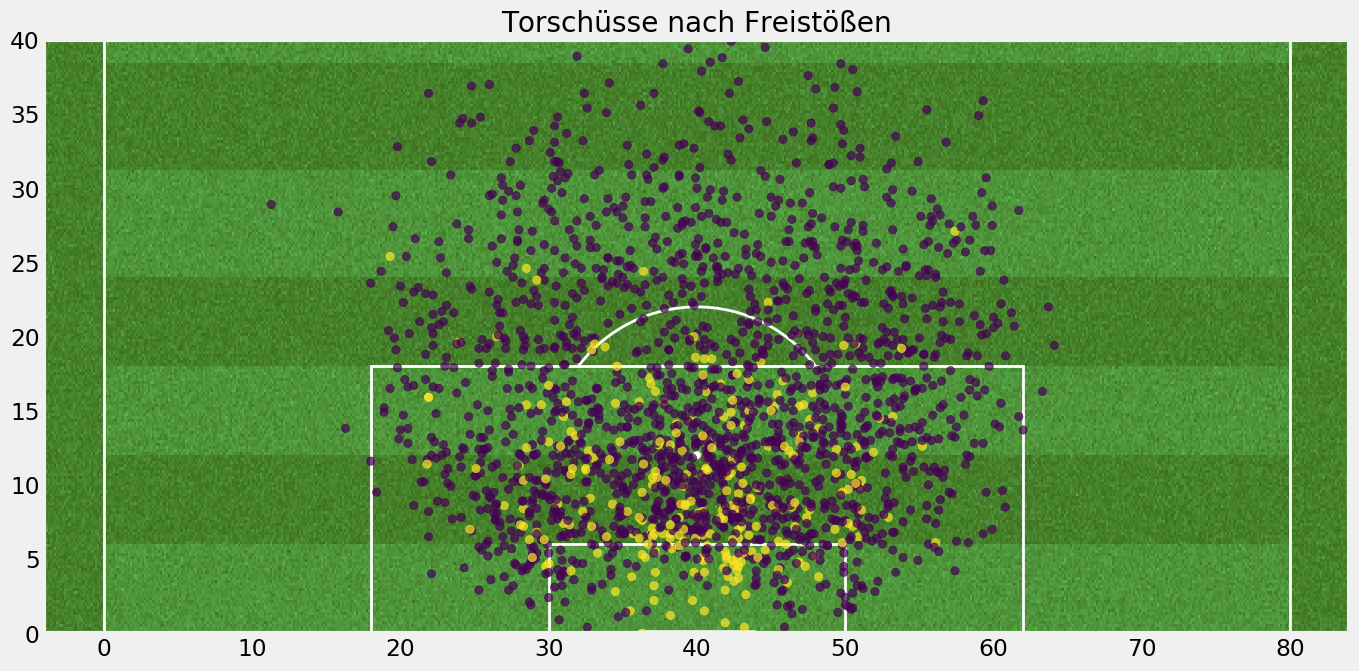

In [45]:
from_freekick = shots[(shots['from_free_kick'] == 1) & (shots['free_kick'] == 0)]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-from_freekick['location_y'], 120-from_freekick['location_x'], c=from_freekick['goal'], alpha=0.7)
plt.ylim(0,40)
plt.title('Torschüsse nach Freistößen')
plt.show()

Elfmeter

In [46]:
penalties = pd.read_excel('extracted_data/penalties.xlsx')
penalties = penalties[penalties['end_location_z'] > -1]

In [47]:
penalties.head()

duration  match_id  minute  second  team_id  player_id  goalkeeper_id  \
0  0.671000      9609      20       1      217       5503             -1   
1  0.581456      9827      47      50      208       6930             -1   
2  2.160000      9880      86       7      207       6595             -1   
3  0.619538      9581      38      37      217       5503             -1   
4  0.437000      9726      69      39      217       5503             -1   

   goal  statsbomb_xg  defender  midfielder  striker  end_location_x  \
0     1          0.76         0           0        1           120.0   
1     1          0.76         0           0        1           120.0   
2     1          0.76         0           1        0           120.0   
3     0          0.76         0           0        1           119.3   
4     0          0.76         0           0        1           117.8   

   end_location_y  end_location_z  
0            37.4             1.2  
1            43.1             2.3  
2            42.0             0.2  
3            36.9             0.8  
4            41.5             1.9

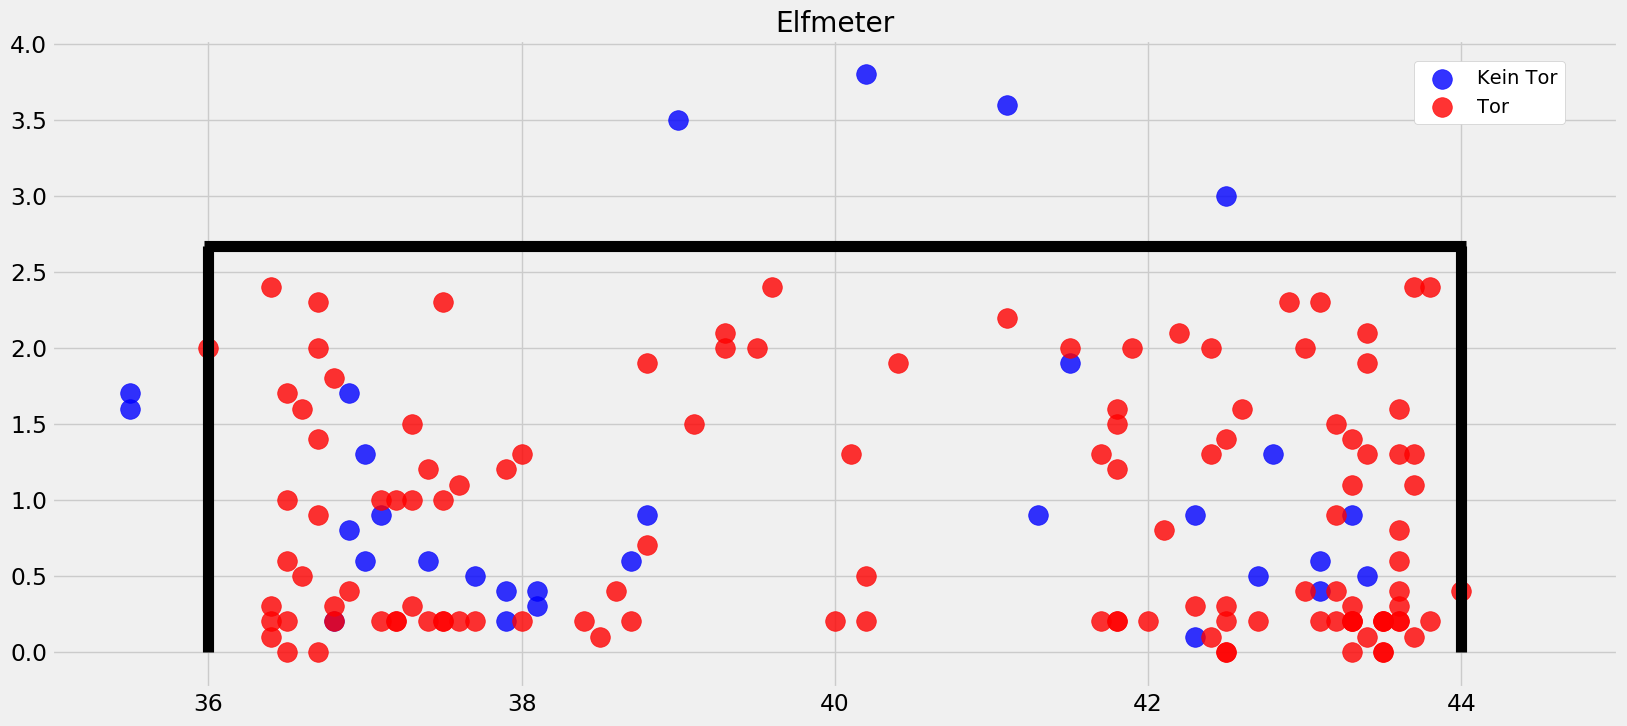

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,8))
plt.vlines(36,0,2.67,linestyle='-', linewidth=8)
plt.vlines(44,0,2.67,linestyle='-', linewidth=8)
plt.hlines(2.67,35.97,44.03,linestyle='-', linewidth=8)
penalty_no_goals = penalties[penalties['goal'] == 0]
penalty_goals = penalties[penalties['goal'] == 1]
plt.scatter(penalty_no_goals['end_location_y'], penalty_no_goals['end_location_z'], color='blue', alpha=0.8, s=200, label='Kein Tor')
plt.scatter(penalty_goals['end_location_y'], penalty_goals['end_location_z'], color='red', alpha=0.8, s=200, label='Tor')
plt.title('Elfmeter')
plt.xlim(35,45)
leg = plt.legend(loc=(0.87,0.87), facecolor='white', framealpha=1)
plt.show()

In [49]:
len(penalty_goals) / len(penalties)

0.8013245033112583

In [50]:
len(penalties)

151